In [3]:
import cv2
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt 
from image_extractor import preprocess_hsv, init_lut, curved,linear_fn

plt.rcParams['figure.dpi'] = 102.46
plt.rcParams["figure.figsize"] = (14,6)
lut1 = init_lut(fn=linear_fn, coefficient=15)
lut2 = init_lut(fn=curved, coefficient=1.5)

In [4]:
image2_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (43).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (100).JPG'
image1_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_PartiallyPurple/image (86).JPG'
# image2_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Brown/image (18).JPG'

# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_White/image (25).JPG'


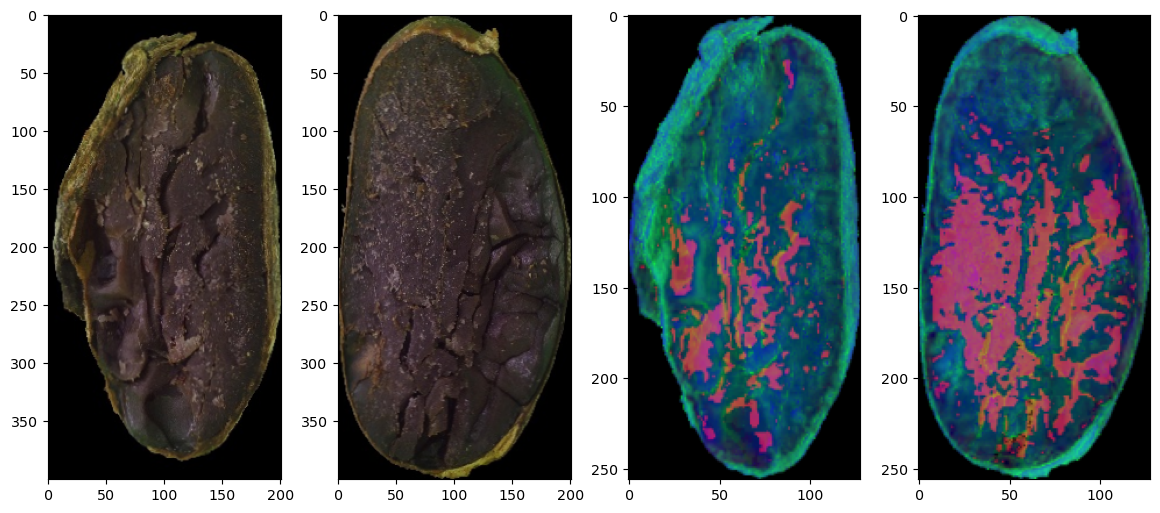

In [5]:

image  = cv2.imread(image1_dir)
image3  = cv2.imread(image2_dir)

image_hsv1, cnt1, ellipse, image2 = preprocess_hsv(image, lut1=None, lut2=lut2, Contour=True, origin_bgr=True)
image_hsv2, cnt2, ellipse, image4 = preprocess_hsv(image3, lut1=None, lut2=lut2, Contour=True, origin_bgr=True)

x,y,w,h = cv2.boundingRect(cnt1)
x,y,w,h = cv2.boundingRect(cnt2)

image_rgb1 = cv2.cvtColor(image2[y:y+h, x:x+w], cv2.COLOR_BGR2RGB)
image_rgb2 = cv2.cvtColor(image4[y:y+h, x:x+w], cv2.COLOR_BGR2RGB)

image_hsv1 = cv2.resize(image_hsv1, (128,256))
image_hsv2 = cv2.resize(image_hsv2, (128,256))

plt.subplot(1,4,1)
plt.imshow(image_rgb1)
plt.subplot(1,4,2)
plt.imshow(image_rgb2)
plt.subplot(1,4,3)
plt.imshow(image_hsv1)
plt.subplot(1,4,4)
plt.imshow(image_hsv2)

plt.show()

In [6]:
image_rgb1 = image_hsv1
image_rgb2 = image_hsv2

In [7]:
hist_R1, bin_edge = np.histogram(image_rgb1[:,:,0], 252,(4,255))
hist_G1, bin_edge = np.histogram(image_rgb1[:,:,1], 252,(4,255))
hist_B1, bin_edge = np.histogram(image_rgb1[:,:,2], 252,(4,255))

hist_R2, bin_edge = np.histogram(image_rgb2[:,:,0], 252,(4,255))
hist_G2, bin_edge = np.histogram(image_rgb2[:,:,1], 252,(4,255))
hist_B2, bin_edge = np.histogram(image_rgb2[:,:,2], 252,(4,255))

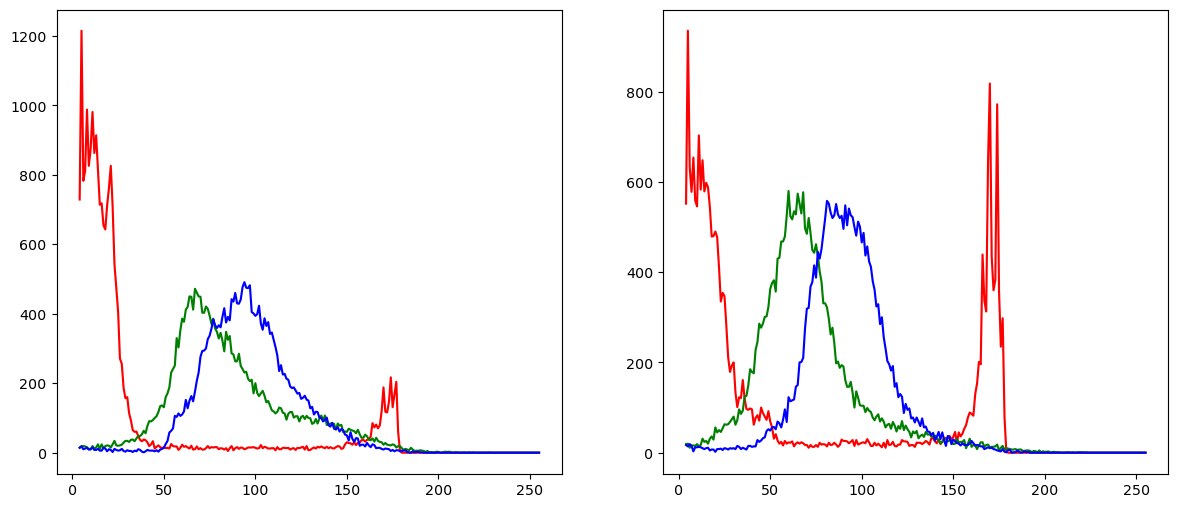

In [8]:
x = np.linspace(4,255,252)
plt.subplot(1,2,1)
plt.plot(x, hist_R1,'r')
plt.plot(x, hist_G1, 'g')
plt.plot(x, hist_B1, 'b')
plt.subplot(1,2,2)
plt.plot(x, hist_R2,'r')
plt.plot(x, hist_G2, 'g')
plt.plot(x, hist_B2, 'b')
plt.show()

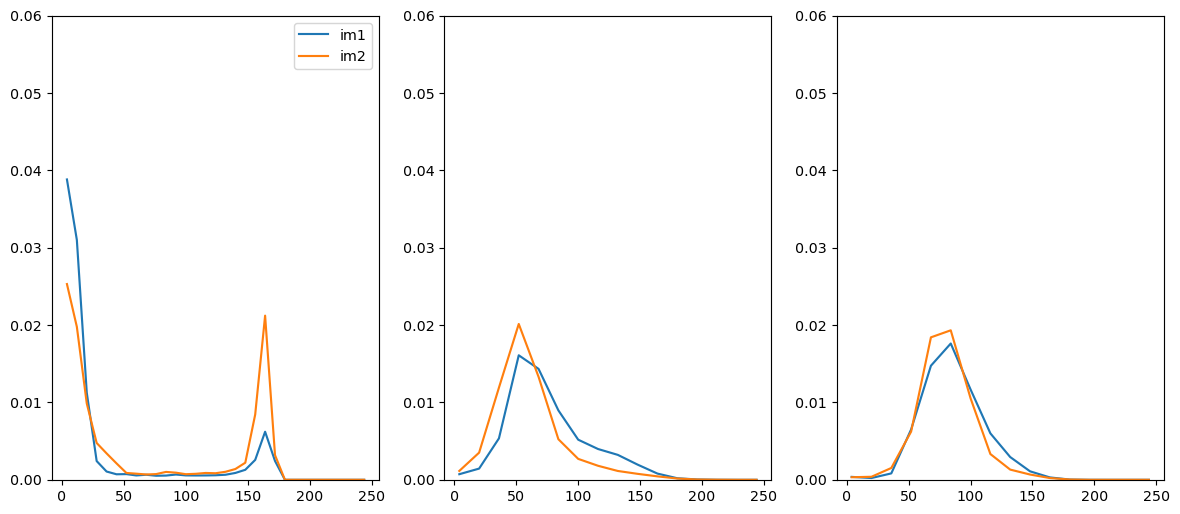

In [17]:
nhist_R1 = hist_R1 / np.sum(hist_R1)
nhist_G1 = hist_G1 / np.sum(hist_G1)
nhist_B1 = hist_B1 / np.sum(hist_B1)
nhist_R2 = hist_R2 / np.sum(hist_R2)
nhist_G2 = hist_G2 / np.sum(hist_G2)
nhist_B2 = hist_B2 / np.sum(hist_B2)
myhist_r1 = []
myhist_b1 = []
myhist_g1 = []
myhist_r2 = []
myhist_b2 = []
myhist_g2 = []
a=[]
b=[]
bin_width = int(256/32)

for i in range(4,255,bin_width):
    a.append(i)
    myhist_r1.append(np.mean(nhist_R1[i:i+bin_width]))
    myhist_r2.append(np.mean(nhist_R2[i:i+bin_width]))

for i in range(4,255,bin_width*2):
    b.append(i)
    myhist_g1.append(np.mean(nhist_G1[i:i+bin_width*2]))
    myhist_b1.append(np.mean(nhist_B1[i:i+bin_width*2]))
    myhist_g2.append(np.mean(nhist_G2[i:i+bin_width*2]))
    myhist_b2.append(np.mean(nhist_B2[i:i+bin_width*2]))

plt.subplot(1,3,1)
plt.ylim([0,0.06])
plt.plot(a, myhist_r1)
plt.plot(a, myhist_r2)
plt.legend(["im1", "im2"])
plt.subplot(1,3,2)
plt.ylim([0,0.06])
plt.plot(b, myhist_g1,b, myhist_g2)
plt.subplot(1,3,3)
plt.ylim([0,0.06])
plt.plot(b, myhist_b1,b, myhist_b2)
plt.show()